In [1]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy

## Task 1.1 

In [119]:
def eulerstep(Tdx, uold, dt):  ##My guy gör comeback 
    unew = uold + dt*(Tdx@uold)
    return unew

In [115]:
def eulersolve(g0, alpha, beta, tend, N, Nt):
     deltaX = 1/(N+2)  # rumssteg från x0 till xN+1
     dt = tend/Nt  # tidsteg från t0 till tN
     Xgrid = np.linspace(0, 1, N+2)
     tgrid = np.linspace(0, tend, Nt+1)
     Tdx = la.toeplitz(np.array([-2, 1] + [0] * (N-2))) ##Skapar en Toeplitz matris för disc av andraderivatan
     Tdx = Tdx/(deltaX**2)   #Den hanterar endast interior grid points 

     Y = np.zeros((Nt+1, N)) #Första värdet är tidssteget, andra är x-steget.
     Y[0,:] = g0

     for i in range(Nt):
          Y[i+1,:] = np.transpose(eulerstep(Tdx, np.transpose(Y[i, :]), dt))
     Y = np.hstack((alpha*np.ones((Nt+1, 1)), Y, beta*np.ones((Nt+1, 1)))) #Lägger till gränsvärdena
     
     return Y, Xgrid, tgrid
          


will converge


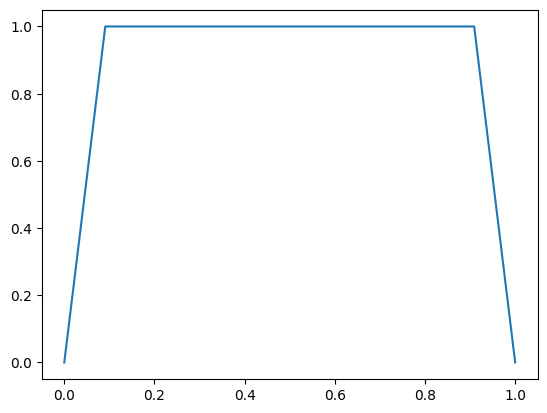

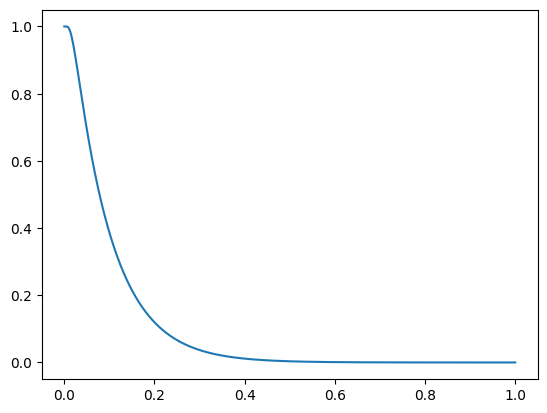

In [120]:
N = 10
Nt = 1000
if Nt > 2*N**2:
     print("will converge")
else:
     print("This will not converge")
alpha = 0
beta = 0
g0 = np.ones(N)
tend = 1
Y, Xgrid, tgrid = eulersolve(g0, alpha, beta, tend, N, Nt)
plt.plot(Xgrid, Y[0,:], label = "t = 0")
plt.show()
plt.plot(tgrid, Y[:,int(N/2)], label = "x = 0.5")